<h1>Histograms, Binnings and Density</h1>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data = np.random.randn(1000)

/var/folders/c8/z4lh2j2s5kq5jvv28mrv0rw40000gn/T/ipykernel_46075/3218537401.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


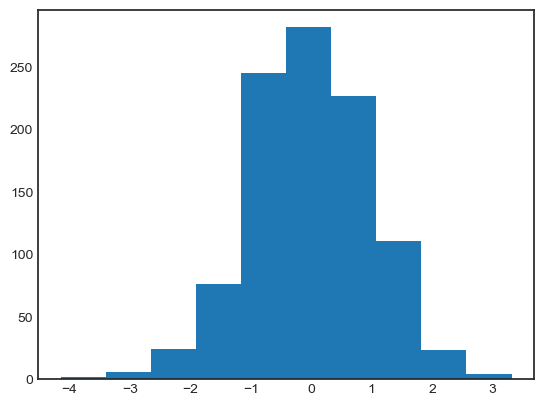

In [2]:
plt.hist(data);

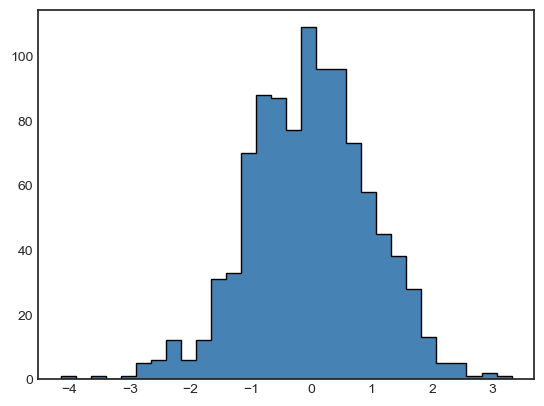

In [3]:
plt.hist(data, bins=30,histtype='stepfilled',color='steelblue',edgecolor='black');

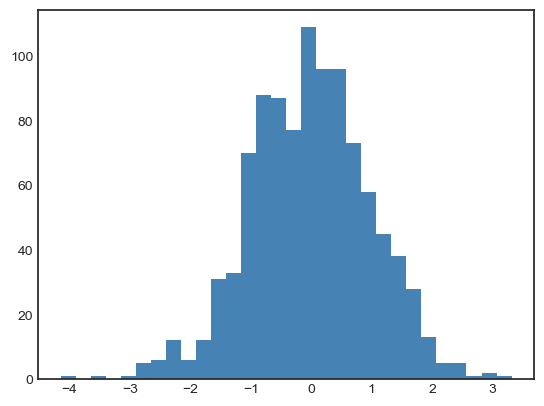

In [4]:
plt.hist(data, bins=30,histtype='stepfilled',color='steelblue',edgecolor='none');

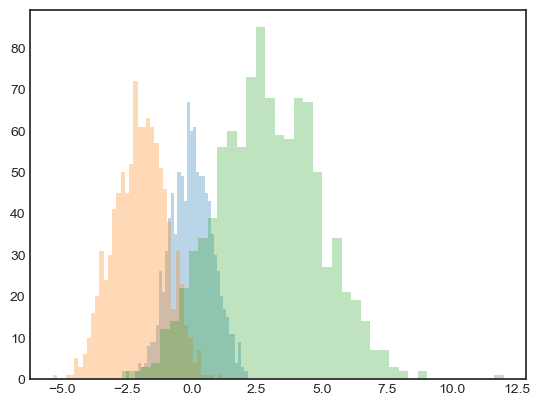

In [6]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled',alpha=0.3,bins=40)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs);

In [7]:
counts, bin_edges = np.histogram(data,bins=5)
print(counts)

[  8 100 527 338  27]


<h3>Two Dimensional Histogram and Binnings</h3>

In [8]:
mean = [0,0]
cov = [[1,1,],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,10000).T

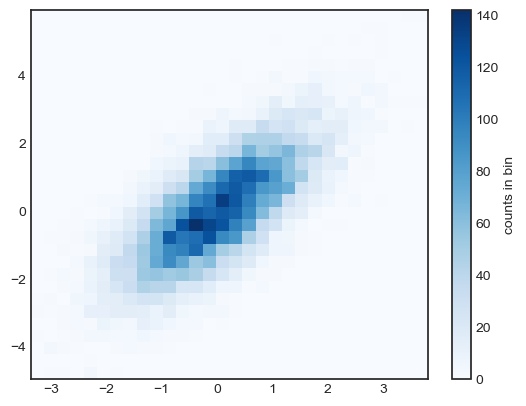

In [9]:
# Straightforward way to plot 2 - dimensional histogram is to use Matplotlibs plt.hist2d
plt.hist2d(x,y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin');

In [10]:
counts, xedges, yedges = np.histogram2d(x,y,bins=30);
print(counts)

[[  0.   0.   0.   1.   0.   2.   1.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  1.   0.   4.   0.   0.   1.   2.   0.   1.   0.   0.   1.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  1.   0.   2.   1.   2.   2.   0.   2.   3.   0.   2.   1.   1.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   1.   2.   3.   3.   6.   3.   2.   3.   1.   2.   1.   1.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  4.   1.   0.   4.   2.  12.   7.   9.   8.  10.   2.   6.   3.   0.
    1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   4.   8.  12.  14.  15.  13.  17.  15.  11.   7.   1.
    3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  1.   0.   2.   3.   6.  15.  15.  23.  30.  32.  18.  

<h4>plt.hexbin:Hexagonal binnings</h4>

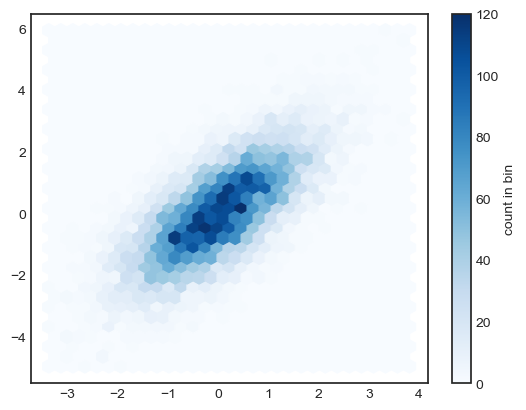

In [11]:
plt.hexbin(x,y,gridsize=30,cmap='Blues')
cb = plt.colorbar(label='count in bin');

<h4>Kernel Density Estimation</h4>

In [12]:
# KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth 
# function.
from scipy.stats import gaussian_kde

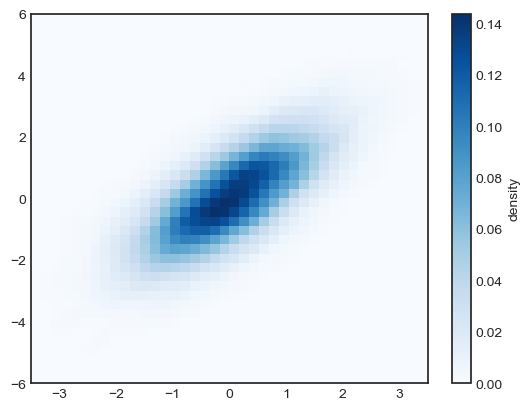

In [13]:
# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
origin='lower', aspect='auto',
extent=[-3.5, 3.5, -6, 6],
cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")